In [1]:
from tensorflow import keras
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import model_from_json

# m = keras.models.load_model('../models/tcn_model')



# load json and create model
json_file = open('../models/lstm_model/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
m = model_from_json(loaded_model_json)
# load weights into new model
m.load_weights("../models/lstm_model/model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
m.compile(optimizer='adam', loss='mse')

C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


Loaded model from disk


In [2]:

# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model

# load model
model = load_model('../models/lstm_model.h5')
model.compile(optimizer='adam', loss='mse')


In [3]:
from numpy import array

def lag_days(col, x):
    df_new = pd.concat([col.shift(i) for i in range(x + 1)], axis=1)
    col_names = ['t-' + str(i) for i in range(x + 1)]
    df_new.columns = col_names
    df_new.columns = list(df_new.columns)[::-1]
    return df_new.dropna()


def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix - 1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('../datasets/daily-min-temperatures-australia.csv')
predictor = 'Temp'
raw_seq = list(df[predictor].values)
raw_seq = (raw_seq - np.min(raw_seq)) / np.ptp(raw_seq)
df[predictor] = raw_seq
df = lag_days(df[predictor], 49)
cols = list(df.columns)
cols.remove('t-0')
col_arr = [df[col].values for col in cols] + [df['t-0'].values]
dataset = np.stack(col_arr, axis=1)

# choose a number of time steps
n_steps_in, n_steps_out = 49, 49
# covert into input/output
x, y = split_sequences(dataset, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
n_features = x.shape[2]
x = x.reshape((x.shape[0], x.shape[1], n_features))
x = np.asarray(x).astype('float32')
y = np.asarray(y).astype('float32')

timesteps = 49

In [5]:
x_input.shape

NameError: name 'x_input' is not defined

In [15]:
model.fit(x_input)

ValueError: in user code:

    C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:227 assert_input_compatibility
        ', found shape=' + str(shape))

    ValueError: Input 0 is incompatible with layer sequential_1: expected shape=(None, None, 1), found shape=[None, 49, 49]


In [8]:
# demonstrate prediction
x_input = x[-1]
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input)

ValueError: in user code:

    C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:227 assert_input_compatibility
        ', found shape=' + str(shape))

    ValueError: Input 0 is incompatible with layer sequential_1: expected shape=(None, None, 1), found shape=[None, 49, 49]


In [7]:
yhat

array([[0.3178725 , 0.29579988, 0.30227774, ..., 0.35513663, 0.34332186,
        0.34717745],
       [0.31944332, 0.29742223, 0.30437663, ..., 0.35617134, 0.3447812 ,
        0.34841347],
       [0.31947854, 0.2973121 , 0.30470306, ..., 0.3562254 , 0.34502622,
        0.3484801 ],
       ...,
       [0.36510706, 0.35450828, 0.3464707 , ..., 0.38416025, 0.37282443,
        0.3817103 ],
       [0.3608253 , 0.35067782, 0.33962128, ..., 0.38121527, 0.36798915,
        0.37818402],
       [0.34889817, 0.33676377, 0.32672647, ..., 0.37369484, 0.35922045,
        0.36922246]], dtype=float32)

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def calculate_metrics(yhat, test_y, forecasting_horizon):
    rmse = mean_squared_error(yhat, test_y) ** 0.5
    if forecasting_horizon > 1:
        explained_variance = r2_score(test_y, yhat, multioutput = "variance_weighted")
    else:
        explained_variance = 1/abs(rmse)
    return rmse, explained_variance

rmse, r2 = calculate_metrics(yhat[0], df['t-0'].values[-49:], 49)

In [12]:
rmse, r2

(0.17082430456689313, -1.1000173215612015)

In [ ]:
from tensorflow.keras import Input, Model
from tcn import TCN, tcn_full_summary

batch_size = None
i = Input(batch_shape=(batch_size, n_steps_in, n_features))

o = TCN(return_sequences=False)(i)  # The TCN layers are here.
o = Dense(n_steps_out)(o)

m = Model(inputs=[i], outputs=[o])
m.compile(optimizer='adam', loss='mse')

In [13]:

# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model

# load model
model = load_model('../models/tcn_model.h5')



ValueError: Unknown layer: TCN

In [ ]:
import tensorflow
loaded = tensorflow.keras.models.load_model("my_model")

In [210]:
#### from tensorflow.keras import Input, Model

from tensorflow.keras import Input, Model

from tcn import TCN, tcn_full_summary
import pandas as pd

from numpy import array
from tensorflow.keras.layers import Dense
import numpy as np




def lag_days(col, x):
    df_new = pd.concat([col.shift(i) for i in range(x + 1)], axis=1)
    col_names = ['t-' + str(i) for i in range(x + 1)]
    df_new.columns = col_names
    df_new.columns = list(df_new.columns)[::-1]
    return df_new.dropna()



# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix - 1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# def temporal_convolutional_network(dataset_location, predictor, forecasting_horizon, cfg):
    
dataset_location, predictor, forecasting_horizon, cfg = '../datasets/daily-min-temperatures-australia.csv', 'Temp', 49, {'lag_days': 47}
df = pd.read_csv(dataset_location)
raw_seq = list(df[predictor].values)
raw_seq = (raw_seq - np.min(raw_seq)) / np.ptp(raw_seq)
df[predictor] = raw_seq
df = lag_days(df[predictor], cfg['lag_days'])
cols = list(df.columns)
cols.remove('t-0')
col_arr = [df[col].values for col in cols] + [df['t-0'].values]
dataset = np.stack(col_arr, axis=1)

# choose a number of time steps
n_steps_in, n_steps_out = forecasting_horizon, forecasting_horizon
# covert into input/output
x, y = split_sequences(dataset, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
n_features = x.shape[2]

x = np.asarray(x).astype('float32')
y = np.asarray(y).astype('float32')

timesteps = cfg['lag_days']
batch_size = None
i = Input(batch_shape=(batch_size, n_steps_in, n_features))

o = TCN(return_sequences=False)(i)  # The TCN layers are here.
o = Dense(n_steps_out)(o)

m = Model(inputs=[i], outputs=[o])
m.compile(optimizer='adam', loss='mse')

tcn_full_summary(m, expand_residual_blocks=False)

m.fit(x, y, epochs=100, validation_split=0.2, shuffle=False, verbose=1)

m.save('models/tcn_model.h5')



import os

filename = "models/tcn_model/model.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

# serialize model to JSON
model_json = m.to_json()
with open("models/tcn_model/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
m.save_weights("models/tcn_model/model.h5")
print("Saved model to disk")


# demonstrate prediction
x_input = x[-1]
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = m.predict(x_input, verbose=0)

rmse, r2 = calculate_metrics(yhat[0], df['t-0'].values[-forecasting_horizon:], forecasting_horizon)
#     return r2, rmse, df['t-0'].values[-forecasting_horizon:], yhat

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 49, 47)]          0         
_________________________________________________________________
residual_block_0 (ResidualBl [(None, 49, 64), (None, 4 17408     
_________________________________________________________________
residual_block_1 (ResidualBl [(None, 49, 64), (None, 4 16512     
_________________________________________________________________
residual_block_2 (ResidualBl [(None, 49, 64), (None, 4 16512     
_________________________________________________________________
residual_block_3 (ResidualBl [(None, 49, 64), (None, 4 16512     
_________________________________________________________________
residual_block_4 (ResidualBl [(None, 49, 64), (None, 4 16512     
_________________________________________________________________
residual_block_5 (ResidualBl [(None, 49, 64), (None, 

OSError: Unable to create file (unable to open file: name = 'models/tcn_model.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)

In [211]:
x.shape

(3507, 49, 47)

In [215]:
x[0]

array([[0.69961977, 0.8060837 , 0.8403042 , ..., 0.5551331 , 0.7148289 ,
        0.6806084 ],
       [0.63117874, 0.69961977, 0.8060837 , ..., 0.60076046, 0.5551331 ,
        0.7148289 ],
       [0.6121673 , 0.63117874, 0.69961977, ..., 0.60076046, 0.60076046,
        0.5551331 ],
       ...,
       [0.6501901 , 0.66539925, 0.6387833 , ..., 0.6121673 , 0.63117874,
        0.69961977],
       [0.68821293, 0.6501901 , 0.66539925, ..., 0.59695816, 0.6121673 ,
        0.63117874],
       [0.63117874, 0.68821293, 0.6501901 , ..., 0.63117874, 0.59695816,
        0.6121673 ]], dtype=float32)

In [216]:
y[0]

array([0.63117874, 0.6121673 , 0.59695816, 0.63117874, 0.62737644,
       0.5475285 , 0.5475285 , 0.70342207, 0.6425856 , 0.66539925,
       0.8060837 , 0.6768061 , 0.7072243 , 0.6463878 , 0.608365  ,
       0.50570345, 0.54372627, 0.4334601 , 0.61977184, 0.6121673 ,
       0.4486692 , 0.46387833, 0.55893534, 0.4486692 , 0.4296578 ,
       0.40304184, 0.44486693, 0.53992397, 0.42585552, 0.6425856 ,
       0.634981  , 0.3079848 , 0.3041825 , 0.33460075, 0.5095057 ,
       0.41444868, 0.5095057 , 0.41825095, 0.5703422 , 0.59695816,
       0.5513308 , 0.60076046, 0.634981  , 0.6387833 , 0.66539925,
       0.6501901 , 0.68821293, 0.63117874, 0.38022813], dtype=float32)

In [ ]:
# demonstrate prediction
x_input = x[-1]
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = m.predict(x_input, verbose=0)

rmse, r2 = calculate_metrics(yhat[0], df['t-0'].values[-forecasting_horizon:], forecasting_horizon)

In [ ]:
rmse, r2

In [29]:
m.save_weights('tcn_weights.h5')

In [43]:
batch_size, n_steps_in, n_features

(None, 49, 47)

In [38]:
batch_size = None

i = Input(batch_shape=(batch_size, n_steps_in, n_features))

o = TCN(return_sequences=False)(i)  # The TCN layers are here.
o = Dense(n_steps_out)(o)

m = Model(inputs=[i], outputs=[o])
m.compile(optimizer='adam', loss='mse')



In [39]:
m.load_weights('tcn_weights.h5')

In [40]:
# demonstrate prediction
x_input = x[-1]
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = m.predict(x_input, verbose=0)

rmse, r2 = calculate_metrics(yhat[0], df['t-0'].values[-forecasting_horizon:], forecasting_horizon)
rmse, r2

(0.05791602485758341, 0.7521953346609496)

In [41]:
config = m.get_config()

In [2]:
np.min(raw_seq)

0.0

In [3]:
np.ptp(raw_seq)

1.0

In [11]:
dataset_location, predictor, forecasting_horizon, cfg = '../datasets/daily-min-temperatures-australia.csv', 'Temp', 49, {'lag_days': 47}
df = pd.read_csv(dataset_location)
raw_seq = list(df[predictor].values)

In [12]:
input_to_predict = raw_seq[-49:]

In [13]:

print(np.min(raw_seq), np.ptp(raw_seq))
raw_seq = (raw_seq - np.min(raw_seq)) / np.ptp(raw_seq)

0.0 26.3


In [14]:
input_to_predict = raw_seq[-49:]

In [15]:
len(input_to_predict)

49

In [32]:
data = {'predictor': input_to_predict}
df = pd.DataFrame(data)

In [33]:
df = lag_days(df['predictor'], 46)
cols = list(df.columns)
cols.remove('t-0')
col_arr = [df[col].values for col in cols] + [df['t-0'].values]
dataset = np.stack(col_arr, axis=1)

In [34]:
# choose a number of time steps
n_steps_in, n_steps_out = 49, 49
# covert into input/output
x, y = split_sequences(dataset, 46, 49)
# the dataset knows the number of features, e.g. 2
n_features = x.shape[2]

x = np.asarray(x).astype('float32')
y = np.asarray(y).astype('float32')

IndexError: tuple index out of range

In [19]:
raw_seq

array([0.78707224, 0.68060837, 0.7148289 , ..., 0.51330798, 0.59695817,
       0.49429658])

In [23]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix - 1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
X, y = split_sequences(raw_seq, 49, 49)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [49]:
from tensorflow.keras import Input, Model

from tcn import TCN, tcn_full_summary
import pandas as pd

from numpy import array
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def calculate_metrics(yhat, test_y, forecasting_horizon):
    rmse = mean_squared_error(yhat, test_y) ** 0.5
    if forecasting_horizon > 1:
        explained_variance = r2_score(test_y, yhat, multioutput = "variance_weighted")
    else:
        explained_variance = 1/abs(rmse)
    return rmse, explained_variance




def lag_days(col, x):
    df_new = pd.concat([col.shift(i) for i in range(x + 1)], axis=1)
    col_names = ['t-' + str(i) for i in range(x + 1)]
    df_new.columns = col_names
    df_new.columns = list(df_new.columns)[::-1]
    return df_new.dropna()



# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix - 1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [68]:

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [128]:


dataset_location, predictor, forecasting_horizon, cfg = '../datasets/daily-min-temperatures-australia.csv', 'Temp', 49, {'lag_days': 47}

df = pd.read_csv(dataset_location)
raw_seq = list(df[predictor].values)

# min_raw_seq, ptp_raw_seq = np.min(raw_seq), np.ptp(raw_seq)
# raw_seq = (raw_seq - np.min(raw_seq)) / np.ptp(raw_seq)


In [131]:

df = lag_days(df[predictor], cfg['lag_days'])
cols = list(df.columns)
cols.remove('t-0')
col_arr = [df[col].values for col in cols] + [df['t-0'].values]
dataset = np.stack(col_arr, axis=1)

In [132]:
original_df = pd.read_csv(dataset_location)
len(original_df)

3650

In [133]:


# choose a number of time steps
n_steps_in, n_steps_out = forecasting_horizon, forecasting_horizon
# covert into input/output
x, y = split_sequences(dataset, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
x = np.asarray(x).astype('float32')
y = np.asarray(y).astype('float32')

In [134]:
x.shape, y.shape

((3507, 49, 47), (3507, 49))

In [39]:


timesteps = cfg['lag_days']
batch_size = None
i = Input(batch_shape=(batch_size, n_steps_in, n_features))

o = TCN(return_sequences=False)(i)  # The TCN layers are here.
o = Dense(n_steps_out)(o)

m = Model(inputs=[i], outputs=[o])
m.compile(optimizer='adam', loss='mse')
m.load_weights('tcn_weights.h5')






# demonstrate prediction
x_input = x[-1]
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = m.predict(x_input, verbose=0)

rmse, r2 = calculate_metrics(yhat[0], df['t-0'].values[-forecasting_horizon:], forecasting_horizon)
print(rmse, r2)

0.05791602485758341 0.7521953346609496


In [41]:
x_input.shape

(1, 49, 47)

In [42]:
x.shape

(3507, 49, 47)

In [43]:
df['t-0'].values[-forecasting_horizon:]

array([0.17490494, 0.42205323, 0.33079848, 0.38022814, 0.42965779,
       0.39923954, 0.37642586, 0.41825095, 0.53231939, 0.34980989,
       0.37262357, 0.22813688, 0.37262357, 0.34980989, 0.4486692 ,
       0.39163498, 0.2851711 , 0.29277567, 0.60076046, 0.55513308,
       0.39923954, 0.42965779, 0.41444867, 0.24334601, 0.41444867,
       0.34220532, 0.41444867, 0.47148289, 0.44106464, 0.50570342,
       0.54752852, 0.69961977, 0.51711027, 0.56653992, 0.56273764,
       0.58555133, 0.4486692 , 0.49429658, 0.42205323, 0.47528517,
       0.69581749, 0.73003802, 0.58555133, 0.49809886, 0.43726236,
       0.3269962 , 0.47908745, 0.52471483, 0.55513308])

In [44]:
x_input

array([[[0.37262356, 0.61977184, 0.40304184, ..., 0.29657796,
         0.3231939 , 0.243346  ],
        [0.17490494, 0.37262356, 0.61977184, ..., 0.35361215,
         0.29657796, 0.3231939 ],
        [0.42205322, 0.17490494, 0.37262356, ..., 0.31939164,
         0.35361215, 0.29657796],
        ...,
        [0.3269962 , 0.43726236, 0.49809885, ..., 0.42205322,
         0.17490494, 0.37262356],
        [0.47908744, 0.3269962 , 0.43726236, ..., 0.33079848,
         0.42205322, 0.17490494],
        [0.5247148 , 0.47908744, 0.3269962 , ..., 0.38022813,
         0.33079848, 0.42205322]]], dtype=float32)

In [45]:
n_features

47

In [135]:
x[-1]

array([[ 9.8, 16.3, 10.6, ...,  7.8,  8.5,  6.4],
       [ 4.6,  9.8, 16.3, ...,  9.3,  7.8,  8.5],
       [11.1,  4.6,  9.8, ...,  8.4,  9.3,  7.8],
       ...,
       [ 8.6, 11.5, 13.1, ..., 11.1,  4.6,  9.8],
       [12.6,  8.6, 11.5, ...,  8.7, 11.1,  4.6],
       [13.8, 12.6,  8.6, ..., 10. ,  8.7, 11.1]], dtype=float32)

In [136]:
y[-1]

array([ 4.6, 11.1,  8.7, 10. , 11.3, 10.5,  9.9, 11. , 14. ,  9.2,  9.8,
        6. ,  9.8,  9.2, 11.8, 10.3,  7.5,  7.7, 15.8, 14.6, 10.5, 11.3,
       10.9,  6.4, 10.9,  9. , 10.9, 12.4, 11.6, 13.3, 14.4, 18.4, 13.6,
       14.9, 14.8, 15.4, 11.8, 13. , 11.1, 12.5, 18.3, 19.2, 15.4, 13.1,
       11.5,  8.6, 12.6, 13.8, 14.6], dtype=float32)

In [137]:
x

array([[[18.4, 21.2, 22.1, ..., 14.6, 18.8, 17.9],
        [16.6, 18.4, 21.2, ..., 15.8, 14.6, 18.8],
        [16.1, 16.6, 18.4, ..., 15.8, 15.8, 14.6],
        ...,
        [17.1, 17.5, 16.8, ..., 16.1, 16.6, 18.4],
        [18.1, 17.1, 17.5, ..., 15.7, 16.1, 16.6],
        [16.6, 18.1, 17.1, ..., 16.6, 15.7, 16.1]],

       [[16.6, 18.4, 21.2, ..., 15.8, 14.6, 18.8],
        [16.1, 16.6, 18.4, ..., 15.8, 15.8, 14.6],
        [15.7, 16.1, 16.6, ..., 15.8, 15.8, 15.8],
        ...,
        [18.1, 17.1, 17.5, ..., 15.7, 16.1, 16.6],
        [16.6, 18.1, 17.1, ..., 16.6, 15.7, 16.1],
        [10. , 16.6, 18.1, ..., 16.5, 16.6, 15.7]],

       [[16.1, 16.6, 18.4, ..., 15.8, 15.8, 14.6],
        [15.7, 16.1, 16.6, ..., 15.8, 15.8, 15.8],
        [16.6, 15.7, 16.1, ..., 17.4, 15.8, 15.8],
        ...,
        [16.6, 18.1, 17.1, ..., 16.6, 15.7, 16.1],
        [10. , 16.6, 18.1, ..., 16.5, 16.6, 15.7],
        [14.9, 10. , 16.6, ..., 14.4, 16.5, 16.6]],

       ...,

       [[10.6,  5.2,  6.

In [142]:
from np.lib.stride_tricks import sliding 

sliding_window_view(np.array([1, 2, 3, 4, 5, 6]), window_shape = 3)

ImportError: cannot import name 'sliding_widow_view' from 'numpy.lib.stride_tricks' (C:\Users\DEJOKUR\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\stride_tricks.py)

In [141]:
as_strided(np.array([1, 2, 3, 4, 5, 6]))

array([1, 2, 3, 4, 5, 6])

In [213]:
df = pd.read_csv(dataset_location)

In [214]:
len(df)

3650

In [28]:
from numpy.lib.stride_tricks import as_strided


def rolling_window(a, window_size):
    shape = (a.shape[0] - window_size + 1, window_size) + a.shape[1:]
    strides = (a.strides[0],) + a.strides
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)


dataset_location, predictor, forecasting_horizon, cfg = '../datasets/daily-min-temperatures-australia.csv', 'Temp', 49, {'lag_days': 47}

df = pd.read_csv(dataset_location)
raw_seq = list(df[predictor].values)

min_raw_seq, ptp_raw_seq = np.min(raw_seq), np.ptp(raw_seq)
raw_seq = (raw_seq - np.min(raw_seq)) / np.ptp(raw_seq)

In [29]:
lag_1 = 500 
lag_2 = 500
forecasting_horizon = 49

x = rolling_window(raw_seq, lag_1)[:-forecasting_horizon]
y = rolling_window(raw_seq, forecasting_horizon)[lag_1:]

In [30]:
x.shape

(3102, 500)

In [31]:
xi = []
for i in range(x.shape[0]):
    xi.append(rolling_window(x[i], lag_2))

In [32]:
x = np.array(xi)

In [33]:
x.shape

(3102, 1, 500)

In [34]:
x.shape, y.shape

((3102, 1, 500), (3102, 49))

In [35]:
batch_size = None
i = Input(batch_shape=(batch_size, x.shape[1], x.shape[2]))

o = TCN(return_sequences=False)(i)  # The TCN layers are here.
o = Dense(forecasting_horizon)(o)

m = Model(inputs=[i], outputs=[o])
m.compile(optimizer='adam', loss='mse')

tcn_full_summary(m, expand_residual_blocks=False)

m.fit(x, y, epochs=100, validation_split=0.2, shuffle=False, verbose=1)

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1, 500)]          0         
_________________________________________________________________
residual_block_0 (ResidualBl [(None, 1, 64), (None, 1, 104384    
_________________________________________________________________
residual_block_1 (ResidualBl [(None, 1, 64), (None, 1, 16512     
_________________________________________________________________
residual_block_2 (ResidualBl [(None, 1, 64), (None, 1, 16512     
_________________________________________________________________
residual_block_3 (ResidualBl [(None, 1, 64), (None, 1, 16512     
_________________________________________________________________
residual_block_4 (ResidualBl [(None, 1, 64), (None, 1, 16512     
_________________________________________________________________
residual_block_5 (ResidualBl [(None, 1, 64), (None, 1,

In [37]:
# demonstrate prediction
x_input = x[-1]
x_input = x_input.reshape((1, x.shape[1], x.shape[2]))
yhat = m.predict(x_input, verbose=0)

In [39]:
x_input.shape

(1, 1, 500)

In [36]:


rmse, r2 = calculate_metrics(yhat[0], y[-1], forecasting_horizon)
print(rmse, r2)

NameError: name 'calculate_metrics' is not defined

In [331]:
yhat

array([[0.53544265, 0.53490907, 0.5574221 , 0.5317352 , 0.54233104,
        0.52954817, 0.5520925 , 0.53929114, 0.55763316, 0.55379486,
        0.56352633, 0.5500461 , 0.5506035 , 0.55427796, 0.5636853 ,
        0.5697621 , 0.5728016 , 0.567135  , 0.56377697, 0.5665606 ,
        0.57338977, 0.57711613, 0.5594833 , 0.5771289 , 0.5722681 ,
        0.56195897, 0.56746984, 0.5844873 , 0.5618268 , 0.5862116 ,
        0.5717583 , 0.56768167, 0.5857583 , 0.57638526, 0.5683934 ,
        0.57479876, 0.5738537 , 0.5870762 , 0.5880126 , 0.58709574,
        0.585824  , 0.57265794, 0.5908673 , 0.5860283 , 0.5874331 ,
        0.58623075, 0.5871896 , 0.5943332 , 0.5793346 ]], dtype=float32)

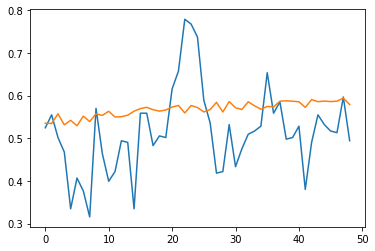

In [332]:
import matplotlib.pyplot as plt
plt.plot(y[-1])
plt.plot(yhat[0])
plt.show()

In [311]:
x[0]

array([[0.78707224, 0.68060837, 0.7148289 , 0.55513308, 0.60076046,
        0.60076046, 0.60076046, 0.66159696, 0.82889734, 0.76045627,
        0.61596958, 0.50570342, 0.63498099, 0.81749049, 0.95057034,
        0.78707224, 0.78326996, 0.94296578, 0.6730038 , 0.58935361,
        0.69201521, 0.46007605, 0.54752852, 0.60836502, 0.62737643,
        0.71102662, 0.73764259, 0.6539924 , 0.58935361, 0.57414449,
        0.58555133, 0.58174905, 0.7148289 , 0.83269962, 0.75665399,
        0.63117871, 0.63878327, 0.55513308, 0.65019011, 0.95057034,
        0.57034221, 0.52091255, 0.52851711, 0.69581749, 0.8365019 ,
        0.84030418, 0.80608365, 0.69961977, 0.63117871, 0.6121673 ,
        0.59695817, 0.63117871, 0.62737643, 0.54752852, 0.54752852,
        0.70342205, 0.64258555, 0.66539924, 0.80608365, 0.67680608,
        0.70722433, 0.64638783, 0.60836502, 0.50570342, 0.54372624,
        0.43346008, 0.61977186, 0.6121673 , 0.4486692 , 0.46387833,
        0.55893536, 0.4486692 , 0.42965779, 0.40

array([[0.68060837, 0.7148289 , 0.55513308, ..., 0.58935361, 0.57414449,
        0.58555133],
       [0.7148289 , 0.55513308, 0.60076046, ..., 0.57414449, 0.58555133,
        0.58174905],
       [0.55513308, 0.60076046, 0.60076046, ..., 0.58555133, 0.58174905,
        0.7148289 ],
       ...,
       [0.46387833, 0.55893536, 0.4486692 , ..., 0.38022814, 0.56653992,
        0.60456274],
       [0.55893536, 0.4486692 , 0.42965779, ..., 0.56653992, 0.60456274,
        0.49429658],
       [0.4486692 , 0.42965779, 0.40304183, ..., 0.60456274, 0.49429658,
        0.28897338]])

In [274]:
y[0]

array([0.28897338, 0.43726236, 0.51330798, 0.49429658, 0.50570342,
       0.46007605, 0.47148289, 0.50190114, 0.52471483, 0.40304183,
       0.34220532, 0.38022814, 0.37262357, 0.43726236, 0.33840304,
       0.28136882, 0.37642586, 0.35361217, 0.37642586, 0.28136882,
       0.3269962 , 0.45247148, 0.53231939, 0.3269962 , 0.38022814,
       0.51330798, 0.45627376, 0.39923954, 0.40684411, 0.30798479,
       0.38403042, 0.40304183, 0.20152091, 0.25095057, 0.32319392,
       0.42585551, 0.37262357, 0.2243346 , 0.121673  , 0.07984791,
       0.12927757, 0.20532319, 0.36501901, 0.43726236, 0.46768061,
       0.47908745, 0.41825095, 0.42585551, 0.43346008])

In [1]:
import json
cfg = []
with open('../models/tcn_model/config.json') as f:
    cfg = json.load(f)

cfg

{'algo': 'tcn',
 'lag_days': 22,
 'forecasting_horizon': 49,
 'min_raw_seq': 0.0,
 'ptp_raw_seq': 26.3}

In [29]:
from tensorflow.keras import Input, Model

from tcn import TCN, tcn_full_summary
import pandas as pd

from numpy import array
from tensorflow.keras.layers import Dense
import numpy as np


import json
cfg = []
with open('../models/tcn_model/config.json') as f:
    cfg = json.load(f)



def rolling_window(a, window_size):
    shape = (a.shape[0] - window_size + 1, window_size) + a.shape[1:]
    strides = (a.strides[0],) + a.strides
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)


raw_seq = np.array([i for i in range(cfg['lag_days'])])

min_raw_seq, ptp_raw_seq = cfg['min_raw_seq'], cfg['ptp_raw_seq'] 

raw_seq = (raw_seq - min_raw_seq) / ptp_raw_seq

lag_1 = cfg['lag_days']
lag_2 = cfg['lag_days']

forecasting_horizon = cfg['forecasting_horizon']

n_steps_out = forecasting_horizon


batch_size = None
print(cfg['lag_days'])
i = Input(batch_shape=(batch_size, 1,  cfg['lag_days']))

o = TCN(return_sequences=False)(i)  # The TCN layers are here.
o = Dense(n_steps_out)(o)

m = Model(inputs=[i], outputs=[o])
m.compile(optimizer='adam', loss='mse')
m.load_weights('../models/tcn_model/model_weights.h5')


raw_seq = raw_seq.reshape((1, 1, cfg['lag_days']))
yhat = m.predict(raw_seq, verbose=0)
print(yhat)


22
[[0.4513087  0.34151334 0.49708158 0.5738388  0.56712914 0.5615907
  0.51926154 0.49889866 0.57239866 0.4269156  0.47094274 0.49990848
  0.4616685  0.566709   0.4998831  0.56598127 0.48101762 0.58951074
  0.609065   0.58357847 0.49606597 0.64756453 0.58663875 0.6769288
  0.5580581  0.595637   0.5562046  0.6108148  0.54799503 0.48129505
  0.6366001  0.56001526 0.5415855  0.6542248  0.5127403  0.51224005
  0.54558754 0.4747848  0.48723406 0.5499362  0.5926806  0.4044075
  0.38366842 0.58833236 0.6282302  0.4254393  0.45623684 0.5446974
  0.6737304 ]]


In [21]:
i = Input(batch_shape=(batch_size, 1,  cfg['lag_days']))

o = TCN(return_sequences=False)(i)  # The TCN layers are here.
o = Dense(n_steps_out)(o)

m = Model(inputs=[i], outputs=[o])
m.compile(optimizer='adam', loss='mse')
tcn_full_summary(m, expand_residual_blocks=False)
m.load_weights('../models/tcn_model/model_weights.h5')

Model: "functional_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 1, 22)]           0         
_________________________________________________________________
residual_block_0 (ResidualBl [(None, 1, 64), (None, 1, 12608     
_________________________________________________________________
residual_block_1 (ResidualBl [(None, 1, 64), (None, 1, 16512     
_________________________________________________________________
residual_block_2 (ResidualBl [(None, 1, 64), (None, 1, 16512     
_________________________________________________________________
residual_block_3 (ResidualBl [(None, 1, 64), (None, 1, 16512     
_________________________________________________________________
residual_block_4 (ResidualBl [(None, 1, 64), (None, 1, 16512     
_________________________________________________________________
residual_block_5 (ResidualBl [(None, 1, 64), (None, 1

In [6]:
min_raw_seq, ptp_raw_seq = cfg['min_raw_seq'], cfg['ptp_raw_seq'] 

In [10]:
raw_seq = np.array([10, 11, 12, 11, 12, 10, 14, 15, 16])

min_raw_seq, ptp_raw_seq = cfg['min_raw_seq'], cfg['ptp_raw_seq'] 

raw_seq = (raw_seq - min_raw_seq) / ptp_raw_seq


In [11]:
raw_seq

array([0.38022814, 0.41825095, 0.45627376, 0.41825095, 0.45627376,
       0.38022814, 0.53231939, 0.57034221, 0.60836502])

In [15]:
 raw_seq.reshape(1,, 1, 8)

array([[[0.38022814],
        [0.41825095],
        [0.45627376],
        [0.41825095],
        [0.45627376],
        [0.38022814],
        [0.53231939],
        [0.57034221]]])

In [27]:
raw_seq.shape

(1, 1, 22)

In [28]:
m.predict(raw_seq)

array([[0.4513087 , 0.34151334, 0.49708158, 0.5738388 , 0.56712914,
        0.5615907 , 0.51926154, 0.49889866, 0.57239866, 0.4269156 ,
        0.47094274, 0.49990848, 0.4616685 , 0.566709  , 0.4998831 ,
        0.56598127, 0.48101762, 0.58951074, 0.609065  , 0.58357847,
        0.49606597, 0.64756453, 0.58663875, 0.6769288 , 0.5580581 ,
        0.595637  , 0.5562046 , 0.6108148 , 0.54799503, 0.48129505,
        0.6366001 , 0.56001526, 0.5415855 , 0.6542248 , 0.5127403 ,
        0.51224005, 0.54558754, 0.4747848 , 0.48723406, 0.5499362 ,
        0.5926806 , 0.4044075 , 0.38366842, 0.58833236, 0.6282302 ,
        0.4254393 , 0.45623684, 0.5446974 , 0.6737304 ]], dtype=float32)